# Gestão de Stocks
Autores: Alef Amaral, João Pinheiro, Ricardo Jesus, Maximiliano Lopes e Petra Santos.

---

Data: De 12/03/25 até XX

---

Contexto: Este projeto tem evoluído de forma consistente dentro das metodologias ágeis, com todos os aspetos essenciais bem definidos. A equipa de desenvolvimento tem demonstrado um forte espírito de cooperação e competência, atingindo marcos importantes ao longo do processo. A gestão do projeto tem assegurado a coordenação eficiente das tarefas, desde a logística de materiais à organização de parcerias e recursos. Para garantir um fluxo de trabalho alinhado, realizam-se reuniões frequentes, onde se analisam avanços, se esclarecem dúvidas e se tomam decisões para otimizar o progresso.

---

Localização: Maia, 2025.

Este código define a classe Armazém, que representa um armazém com um nome, uma capacidade máxima e um stock de mercadorias. Através do método adicionar_mercadoria, é possível adicionar produtos ao stock, desde que a capacidade total não seja excedida. Se o produto já existir, a quantidade é aumentada; caso contrário, é criado um novo registo com a quantidade, preço e peso do produto.

In [ ]:
import matplotlib.pyplot as plt

class Armazem:

    def __init__(self, nome, capacidade, Lat, Lon):
        # Verifica se já existe um armazém com o mesmo nome
        for armazem in armas:
            if armazem.nome == nome:
                print(f"❌ Erro: já existe um armazém com o nome '{nome}'.")
                return  # Interrompe a criação

        self.nome = nome
        self.capacidade = capacidade
        self.Lat = Lat
        self.Lon = Lon
        self.stock = {}
        self.logs = []
        self.historico_margens = {}
        armas.append(self)
        print(f"✅ Sucesso: Armazém criando [ '{nome}' ].")

    def adicionar_mercadoria(self, nome, quantidade, preco, peso):
        if quantidade < 0 or preco < 0 or peso < 0:
            print("❌ Erro: Introduza apenas valores positivos!")
            return
        if sum(produto["quantidade"] for produto in self.stock.values()) + quantidade > self.capacidade:
            print("❌ Erro: Capacidade excedida!")
            return

        if nome in self.stock:
            stock_antigo = self.stock[nome]
            qtd_antiga = stock_antigo["quantidade"]
            preco_antigo = stock_antigo["preço"]

            # Calcular média ponderada
            novo_preco_medio = ((qtd_antiga * preco_antigo) + (quantidade * preco)) / (qtd_antiga + quantidade)

            self.stock[nome]["quantidade"] += quantidade
            self.stock[nome]["preço"] = novo_preco_medio
        else:
            self.stock[nome] = {"quantidade": quantidade, "preço": preco, "peso": peso}

        print(f"📦 {quantidade} unidades de {nome} adicionadas ao {self.nome}.")

    def remover_mercadoria(self, nome, quantidade):
        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:
            self.stock[nome]["quantidade"] -= quantidade
            if self.stock[nome]["quantidade"] == 0:
                del self.stock[nome]
            print(f"🗑️ {quantidade} unidades de {nome} removidas do {self.nome}.")
        else:
            print("❌ Erro: Quantidade insuficiente ou produto inexistente.")

    def transferir_mercadoria(self, destino, nome, quantidade):
        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:
            destino.adicionar_mercadoria(nome, quantidade, self.stock[nome]["preço"], self.stock[nome]["peso"])
            self.remover_mercadoria(nome, quantidade)
        else:
            print("❌ Erro: Transferência inválida.")

    def listar_armazens():
        if not armas:
            print("❌ Não existem armazéns registados.")
            return

        for armazem in armas:
            print(f"\n📦 Armazém: {armazem.nome} (Capacidade: {armazem.capacidade})")
            if not armazem.stock:
                print("  - 🏷️ Sem mercadoria.")
            else:
                for produto, detalhes in armazem.stock.items():
                    print(f"  - {produto}: {detalhes['quantidade']} unidades | Preço: {detalhes['preço']}€ | Peso: {detalhes['peso']}kg")

    def verificar_capacidade(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total == self.capacidade:
            print(f"⚠️ Aviso: O armazém '{self.nome}' atingiu a sua capacidade máxima.")
            self.logs.append("Capacidade máxima atingida.")
        elif total > self.capacidade:
            print(f"⚠️ Aviso: O armazém '{self.nome}' ultrapassou a capacidade!")
            self.logs.append("Capacidade ultrapassada.")
        elif total >= self.capacidade * 0.9:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está a 90% da capacidade.")
            self.logs.append("Capacidade a 90%.")

    def mostrar_logs(self):
        print(f"--- 📜 LOGS DO ARMAZÉM '{self.nome}' ---")
        for log in self.logs:
            print(log)

    def custo_medio_produto(self, nome):
        if nome in self.stock:
            preco = self.stock[nome]["preço"]
            print(f"💰 Custo médio de '{nome}' no armazém '{self.nome}': {preco:.2f}€")
            return preco
        else:
            print(f"❌ Produto '{nome}' não encontrado no armazém '{self.nome}'.")
            return None

    def valor_medio_venda_produto(self, nome):
        if nome in self.stock:
            # Calcular o preço médio de venda
            qtd = self.stock[nome]["quantidade"]
            preco_venda = self.stock[nome]["preço"]

            # Valor médio de venda = preço médio * quantidade total
            valor_medio_venda = preco_venda * qtd

            print(f"💰 Valor médio de venda de '{nome}' no armazém '{self.nome}': {valor_medio_venda:.2f}€")
            return valor_medio_venda
        else:
            print(f"❌ Produto '{nome}' não encontrado no armazém '{self.nome}'.")
            return None

    def listar_produtos_maior_margem(self):
        produtos_com_margem = []

        for nome, info in self.stock.items():
            preco_custo = info["preço"]
            quantidade = info["quantidade"]

            if "preço_venda" in info:
                preco_venda = info["preço_venda"]
                margem = ((preco_venda - preco_custo) / preco_venda) * 100
                produtos_com_margem.append((nome, margem, quantidade))

                # Guardar histórico
                if nome not in self.historico_margens:
                    self.historico_margens[nome] = []
                self.historico_margens[nome].append(margem)

        produtos_com_margem.sort(key=lambda x: x[1], reverse=True)

        print(f"📊 --- Produtos com maior margem de lucro no armazém '{self.nome}' ---")
        for nome, margem, quantidade in produtos_com_margem:
            print(f"📈 Produto: {nome} | Margem: {margem:.2f}% | Quantidade: {quantidade}")

    def alerta_quase_cheio(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total >= self.capacidade * 0.9:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está a 90% da sua capacidade!")

    def alerta_quase_vazio(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total <= self.capacidade * 0.1:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está quase vazio (menos de 10% da capacidade).")

    def grafico_evolucao_margens(self):
        if not self.historico_margens:
            print("📉 Ainda não há histórico de margens.")
            return

        plt.figure(figsize=(10, 5))

        for produto, margens in self.historico_margens.items():
            plt.plot(margens, label=produto)

        plt.title(f"📈 Evolução da Margem por Produto - Armazém {self.nome}")
        plt.xlabel("Registos")
        plt.ylabel("Margem (%)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def listar_armazens_mais_lucrativos():
        if not armas:
            print("❌ Não existem armazéns registados.")
            return

        lucros = []

        armazens_filtrados = [armazem for armazem in armas if not armazem.nome.startswith("Armazém")]

        for armazem in armazens_filtrados:
            total_lucro = 0
            for produto, info in armazem.stock.items():
                if "preço_venda" in info:
                    preco_custo = info["preço"]
                    preco_venda = info["preço_venda"]
                    quantidade = info["quantidade"]
                    lucro = (preco_venda - preco_custo) * quantidade
                    total_lucro += lucro
            lucros.append((armazem.nome, total_lucro))

        lucros.sort(key=lambda x: x[1], reverse=True)

        print("\n💰 Armazéns mais lucrativos:")
        for nome, lucro in lucros:
            print(f"💵 - {nome}: {lucro:.2f}€ de lucro estimado")

In [ ]:
# Adição de armazéns
armas =  []

armazem_A = Armazem("Armazém A", 1000, Lat=42.1, Lon=-8.6)
armazem_B = Armazem("Armazém B", 1500, Lat=42.1, Lon=-8.6)
armazem_C = Armazem("Armazém C", 2000, Lat=42.1, Lon=-8.6)

# exemplos de erros e avisos
armazem_D = Armazem("Armazém C", 260, Lat=42.1, Lon=-8.6)

✅ Sucesso: Armazém criando [ 'Armazém A' ].
✅ Sucesso: Armazém criando [ 'Armazém B' ].
✅ Sucesso: Armazém criando [ 'Armazém C' ].
❌ Erro: já existe um armazém com o nome 'Armazém C'.


In [ ]:
# Adição de dados
armazem_A.adicionar_mercadoria("Arroz", 30, 1.2, 2.0)
armazem_A.adicionar_mercadoria("Feijão", 20, 1.5, 1.8)
armazem_B.adicionar_mercadoria("Açúcar", 50, 1.0, 1.5)
armazem_C.adicionar_mercadoria("Sal", 40, 0.8, 1.0)

# exemplos de erros e avisos
armazem_C.adicionar_mercadoria("café", 50, 1.0, 1.5)
armazem_C.adicionar_mercadoria("café", -10, .8, 1.5)


📦 30 unidades de Arroz adicionadas ao Armazém A.
📦 20 unidades de Feijão adicionadas ao Armazém A.
📦 50 unidades de Açúcar adicionadas ao Armazém B.
📦 40 unidades de Sal adicionadas ao Armazém C.
📦 50 unidades de café adicionadas ao Armazém C.
❌ Erro: Introduza apenas valores positivos!


In [ ]:
'''     def remover_mercadoria(self, nome, quantidade):
        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:
            self.stock[nome]["quantidade"] -= quantidade
            if self.stock[nome]["quantidade"] == 0:
                del self.stock[nome]
            print(f"🗑️ {quantidade} unidades de {nome} removidas do {self.nome}.")
        else:
            print("❌ Erro: Quantidade insuficiente ou produto inexistente.") '''

'     def remover_mercadoria(self, nome, quantidade):\n        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:\n            self.stock[nome]["quantidade"] -= quantidade\n            if self.stock[nome]["quantidade"] == 0:\n                del self.stock[nome]\n            print(f"🗑️ {quantidade} unidades de {nome} removidas do {self.nome}.")\n        else:\n            print("❌ Erro: Quantidade insuficiente ou produto inexistente.") '

In [ ]:
# Remoção de mercadoria
armazem_A.remover_mercadoria("Latas", 10)

❌ Erro: Quantidade insuficiente ou produto inexistente.


O método remover_mercadoria permite retirar uma determinada quantidade de um produto do stock. Se a quantidade disponível for suficiente, a quantidade é reduzida e, caso chegue a zero, o produto é removido do armazém. Se o produto não existir ou a quantidade for insuficiente, é apresentada uma mensagem de erro.

In [ ]:
'''   def transferir_mercadoria(self, destino, nome, quantidade):
        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:
            destino.adicionar_mercadoria(nome, quantidade, self.stock[nome]["preço"], self.stock[nome]["peso"])
            self.remover_mercadoria(nome, quantidade)
        else:
            print("❌ Erro: Transferência inválida.") '''

'   def transferir_mercadoria(self, destino, nome, quantidade):\n        if nome in self.stock and self.stock[nome]["quantidade"] >= quantidade:\n            destino.adicionar_mercadoria(nome, quantidade, self.stock[nome]["preço"], self.stock[nome]["peso"])\n            self.remover_mercadoria(nome, quantidade)\n        else:\n            print("❌ Erro: Transferência inválida.") '

In [ ]:
# Transferência entre armazéns
armazem_A.transferir_mercadoria(armazem_B, "Feijão", 10)
armazem_B.transferir_mercadoria(armazem_C, "Açúcar", 20)

📦 10 unidades de Feijão adicionadas ao Armazém B.
🗑️ 10 unidades de Feijão removidas do Armazém A.
📦 20 unidades de Açúcar adicionadas ao Armazém C.
🗑️ 20 unidades de Açúcar removidas do Armazém B.


O método transferir_mercadoria permite transferir uma quantidade específica de um produto para outro armazém. Se houver stock suficiente, o produto é adicionado ao armazém de destino e removido do armazém de origem. Caso contrário, é apresentada uma mensagem de erro.

In [ ]:
''' def listar_armazens():
   for armazem in armas:
    print(armazem.nome) '''

' def listar_armazens():\n   for armazem in armas:\n    print(armazem.nome) '

In [ ]:
Armazem.listar_armazens()


📦 Armazém: Armazém A (Capacidade: 1000)
  - Arroz: 30 unidades | Preço: 1.2€ | Peso: 2.0kg
  - Feijão: 10 unidades | Preço: 1.5€ | Peso: 1.8kg

📦 Armazém: Armazém B (Capacidade: 1500)
  - Açúcar: 30 unidades | Preço: 1.0€ | Peso: 1.5kg
  - Feijão: 10 unidades | Preço: 1.5€ | Peso: 1.8kg

📦 Armazém: Armazém C (Capacidade: 2000)
  - Sal: 40 unidades | Preço: 0.8€ | Peso: 1.0kg
  - café: 50 unidades | Preço: 1.0€ | Peso: 1.5kg
  - Açúcar: 20 unidades | Preço: 1.0€ | Peso: 1.5kg


In [ ]:
'''     def verificar_capacidade(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total == self.capacidade:
            print(f"⚠️ Aviso: O armazém '{self.nome}' atingiu a sua capacidade máxima.")
            self.logs.append("Capacidade máxima atingida.")
        elif total > self.capacidade:
            print(f"⚠️ Aviso: O armazém '{self.nome}' ultrapassou a capacidade!")
            self.logs.append("Capacidade ultrapassada.")
        elif total >= self.capacidade * 0.9:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está a 90% da capacidade.")
            self.logs.append("Capacidade a 90%.") '''

'     def verificar_capacidade(self):\n        total = sum(produto["quantidade"] for produto in self.stock.values())\n        if total == self.capacidade:\n            print(f"⚠️ Aviso: O armazém \'{self.nome}\' atingiu a sua capacidade máxima.")\n            self.logs.append("Capacidade máxima atingida.")\n        elif total > self.capacidade:\n            print(f"⚠️ Aviso: O armazém \'{self.nome}\' ultrapassou a capacidade!")\n            self.logs.append("Capacidade ultrapassada.")\n        elif total >= self.capacidade * 0.9:\n            print(f"⚠️ Aviso: O armazém \'{self.nome}\' está a 90% da capacidade.")\n            self.logs.append("Capacidade a 90%.") '

O método transferir_mercadoria permite mover uma quantidade específica de um determinado produto de um armazém para outro. Antes da transferência, verifica-se se o armazém de origem possui stock suficiente. Se sim, o produto é retirado do armazém de origem e adicionado ao armazém de destino. Caso contrário, é apresentada uma mensagem de erro a informar que a operação não é possível por falta de stock disponível.

In [ ]:
'''     def mostrar_logs(self):
        print(f"--- 📜 LOGS DO ARMAZÉM '{self.nome}' ---")
        for log in self.logs:
            print(log) '''

'     def mostrar_logs(self):\n        print(f"--- 📜 LOGS DO ARMAZÉM \'{self.nome}\' ---")\n        for log in self.logs:\n            print(log) '

In [ ]:
# Criar armazém
armazem_A = Armazem("A", 1000, 0, 0)

# Adicionar mercadoria para atingir 90%
armazem_A.adicionar_mercadoria("Latas", 90, 1.5, 0.3)

# Verificar capacidade
armazem_A.verificar_capacidade()

# Mostrar logs
armazem_A.mostrar_logs()

✅ Sucesso: Armazém criando [ 'A' ].
📦 90 unidades de Latas adicionadas ao A.
--- 📜 LOGS DO ARMAZÉM 'A' ---


O método mostrar_logs apresenta o histórico de eventos registados no armazém. Ao ser chamado, imprime no ecrã todos os logs associados ao armazém em questão, permitindo assim acompanhar ações importantes, como alertas de capacidade ou outras operações relevantes.

In [ ]:
'''     def custo_medio_produto(self, nome):
        if nome in self.stock:
            preco = self.stock[nome]["preço"]
            print(f"💰 Custo médio de '{nome}' no armazém '{self.nome}': {preco:.2f}€")
            return preco
        else:
            print(f"❌ Produto '{nome}' não encontrado no armazém '{self.nome}'.")
            return None '''

'     def custo_medio_produto(self, nome):\n        if nome in self.stock:\n            preco = self.stock[nome]["preço"]\n            print(f"💰 Custo médio de \'{nome}\' no armazém \'{self.nome}\': {preco:.2f}€")\n            return preco\n        else:\n            print(f"❌ Produto \'{nome}\' não encontrado no armazém \'{self.nome}\'.")\n            return None '

In [ ]:
armazem_A.custo_medio_produto("Latas")

💰 Custo médio de 'Latas' no armazém 'A': 1.50€


1.5

Este método permite calcular o preço médio de um produto dentro do armazém. Ele verifica se o produto existe no stock do armazém e, caso exista, retorna o preço médio do produto. Se o produto não for encontrado, o método retorna uma mensagem de erro.

In [ ]:
'''     def valor_medio_venda_produto(self, nome):
        if nome in self.stock:
            # Calcular o preço médio de venda
            qtd = self.stock[nome]["quantidade"]
            preco_venda = self.stock[nome]["preço"]

            # Valor médio de venda = preço médio * quantidade total
            valor_medio_venda = preco_venda * qtd

            print(f"💰 Valor médio de venda de '{nome}' no armazém '{self.nome}': {valor_medio_venda:.2f}€")
            return valor_medio_venda
        else:
            print(f"❌ Produto '{nome}' não encontrado no armazém '{self.nome}'.")
            return None '''

'     def valor_medio_venda_produto(self, nome):\n        if nome in self.stock:\n            # Calcular o preço médio de venda\n            qtd = self.stock[nome]["quantidade"]\n            preco_venda = self.stock[nome]["preço"]\n\n            # Valor médio de venda = preço médio * quantidade total\n            valor_medio_venda = preco_venda * qtd\n\n            print(f"💰 Valor médio de venda de \'{nome}\' no armazém \'{self.nome}\': {valor_medio_venda:.2f}€")\n            return valor_medio_venda\n        else:\n            print(f"❌ Produto \'{nome}\' não encontrado no armazém \'{self.nome}\'.")\n            return None '

In [ ]:
# Adicionando mercadoria com preço de venda
armazem_A.adicionar_mercadoria("Latas", 50, 2.0, 0.5)  # Preço de venda = 2.0€
armazem_A.adicionar_mercadoria("Latas", 50, 3.0, 0.5)  # Preço de venda = 3.0€
armazem_B.adicionar_mercadoria("Latas", 50, 3.0, 0.5)  # Preço de venda = 3.0€

# Calcular o valor médio de venda
armazem_A.valor_medio_venda_produto("Latas")

📦 50 unidades de Latas adicionadas ao A.
📦 50 unidades de Latas adicionadas ao A.
📦 50 unidades de Latas adicionadas ao Armazém B.
💰 Valor médio de venda de 'Latas' no armazém 'A': 385.00€


385.0

Este método calcula o valor médio de venda de um produto dentro do armazém. Ele verifica se o produto está presente no stock e, caso esteja, calcula o valor total de venda com base no preço de venda unitário e na quantidade disponível.

In [ ]:
'''     def listar_produtos_maior_margem(self):
        produtos_com_margem = []

        for nome, info in self.stock.items():
            preco_custo = info["preço"]
            quantidade = info["quantidade"]

            if "preço_venda" in info:
                preco_venda = info["preço_venda"]
                margem = ((preco_venda - preco_custo) / preco_venda) * 100
                produtos_com_margem.append((nome, margem, quantidade))

                # Guardar histórico
                if nome not in self.historico_margens:
                    self.historico_margens[nome] = []
                self.historico_margens[nome].append(margem)

        produtos_com_margem.sort(key=lambda x: x[1], reverse=True)

        print(f"📊 --- Produtos com maior margem de lucro no armazém '{self.nome}' ---")
        for nome, margem, quantidade in produtos_com_margem:
            print(f"📈 Produto: {nome} | Margem: {margem:.2f}% | Quantidade: {quantidade}") '''

'     def listar_produtos_maior_margem(self):\n        produtos_com_margem = []\n\n        for nome, info in self.stock.items():\n            preco_custo = info["preço"]\n            quantidade = info["quantidade"]\n\n            if "preço_venda" in info:\n                preco_venda = info["preço_venda"]\n                margem = ((preco_venda - preco_custo) / preco_venda) * 100\n                produtos_com_margem.append((nome, margem, quantidade))\n\n                # Guardar histórico\n                if nome not in self.historico_margens:\n                    self.historico_margens[nome] = []\n                self.historico_margens[nome].append(margem)\n\n        produtos_com_margem.sort(key=lambda x: x[1], reverse=True)\n\n        print(f"📊 --- Produtos com maior margem de lucro no armazém \'{self.nome}\' ---")\n        for nome, margem, quantidade in produtos_com_margem:\n            print(f"📈 Produto: {nome} | Margem: {margem:.2f}% | Quantidade: {quantidade}") '

In [ ]:
# Adicionando mercadorias com preços de custo e de venda
armazem_A.adicionar_mercadoria("Latas", 10, 2.0, 0.5)  # Preço de custo = 2.0€
armazem_A.stock["Latas"]["preço_venda"] = 3.0  # Preço de venda = 3.0€

armazem_A.adicionar_mercadoria("Peras", 10, 1.0, 0.3)  # Preço de custo = 1.0€
armazem_A.stock["Peras"]["preço_venda"] = 5.5  # Preço de venda = 5.5€

# Listar produtos com maior margem de lucro
armazem_A.listar_produtos_maior_margem()

📦 10 unidades de Latas adicionadas ao A.
📦 10 unidades de Peras adicionadas ao A.
📊 --- Produtos com maior margem de lucro no armazém 'A' ---
📈 Produto: Peras | Margem: 81.82% | Quantidade: 10
📈 Produto: Latas | Margem: 32.50% | Quantidade: 200


Este método lista os produtos com a maior margem de lucro em um determinado armazém. Ele calcula a margem de lucro de cada produto com base no preço de custo (preço de aquisição) e no preço de venda, e exibe os produtos ordenados pela maior margem.

In [ ]:
'''     def alerta_quase_cheio(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total >= self.capacidade * 0.9:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está a 90% da sua capacidade!")

    def alerta_quase_vazio(self):
        total = sum(produto["quantidade"] for produto in self.stock.values())
        if total <= self.capacidade * 0.1:
            print(f"⚠️ Aviso: O armazém '{self.nome}' está quase vazio (menos de 10% da capacidade).") '''

'     def alerta_quase_cheio(self):\n        total = sum(produto["quantidade"] for produto in self.stock.values())\n        if total >= self.capacidade * 0.9:\n            print(f"⚠️ Aviso: O armazém \'{self.nome}\' está a 90% da sua capacidade!")\n\n    def alerta_quase_vazio(self):\n        total = sum(produto["quantidade"] for produto in self.stock.values())\n        if total <= self.capacidade * 0.1:\n            print(f"⚠️ Aviso: O armazém \'{self.nome}\' está quase vazio (menos de 10% da capacidade).") '

In [ ]:
# Adicionando mercadorias
armazem_A.adicionar_mercadoria("Latas", 200, 2.0, 0.5)  # 40 unidades
armazem_B.adicionar_mercadoria("Peras", 200, 1.0, 0.3)  # 30 unidades

# Verificar alertas de capacidade
armazem_A.alerta_quase_cheio()
armazem_A.alerta_quase_vazio()

# Remover mercadoria para verificar alerta de quase vazio
armazem_B.remover_mercadoria("Peras", 300)

# Verificar alertas de capacidade novamente
armazem_A.alerta_quase_cheio()
armazem_A.alerta_quase_vazio()
armazem_B.alerta_quase_cheio()
armazem_B.alerta_quase_vazio()

📦 200 unidades de Latas adicionadas ao A.
📦 200 unidades de Peras adicionadas ao Armazém B.
❌ Erro: Quantidade insuficiente ou produto inexistente.


In [ ]:
'''     def grafico_evolucao_margens(self):
        if not self.historico_margens:
            print("📉 Ainda não há histórico de margens.")
            return

        plt.figure(figsize=(10, 5))

        for produto, margens in self.historico_margens.items():
            plt.plot(margens, label=produto)

        plt.title(f"📈 Evolução da Margem por Produto - Armazém {self.nome}")
        plt.xlabel("Registos")
        plt.ylabel("Margem (%)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show() '''

'     def grafico_evolucao_margens(self):\n        if not self.historico_margens:\n            print("📉 Ainda não há histórico de margens.")\n            return\n\n        plt.figure(figsize=(10, 5))\n\n        for produto, margens in self.historico_margens.items():\n            plt.plot(margens, label=produto)\n\n        plt.title(f"📈 Evolução da Margem por Produto - Armazém {self.nome}")\n        plt.xlabel("Registos")\n        plt.ylabel("Margem (%)")\n        plt.legend()\n        plt.grid(True)\n        plt.tight_layout()\n        plt.show() '

📊 --- Produtos com maior margem de lucro no armazém 'A' ---
📈 Produto: Peras | Margem: 81.82% | Quantidade: 10
📈 Produto: Latas | Margem: 32.92% | Quantidade: 400


<ipython-input-236-635b6b7cecea>:163: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


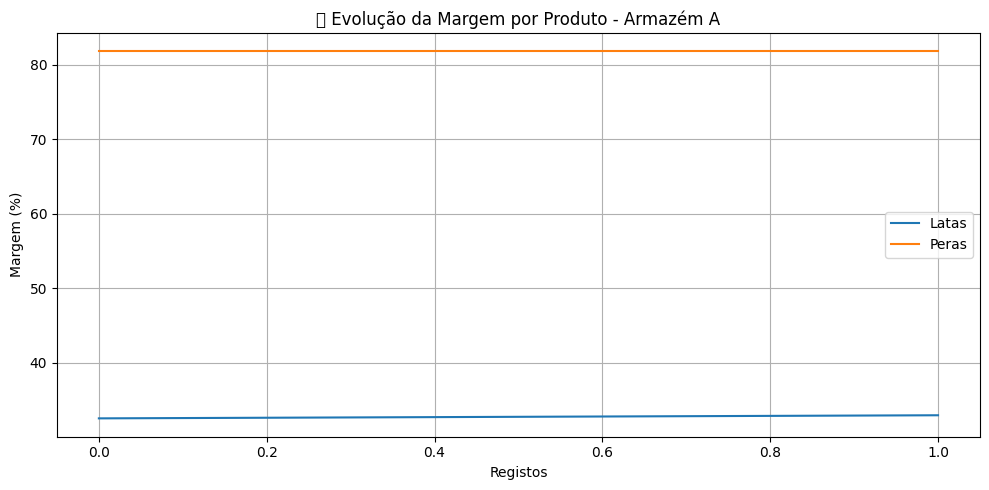

In [ ]:
armazem_A.listar_produtos_maior_margem()
armazem_A.grafico_evolucao_margens()

Este gráfico mostra a evolução da margem de lucro dos produtos ao longo do tempo num determinado armazém. A margem é calculada com base no preço de custo (aquisição) e no preço de venda, permitindo visualizar quais produtos têm tido maior rentabilidade em diferentes momentos.

In [ ]:
'''     def listar_armazens_mais_lucrativos():
        if not armas:
            print("❌ Não existem armazéns registados.")
            return

        lucros = []

        armazens_filtrados = [armazem for armazem in armas if not armazem.nome.startswith("Armazém")]

        for armazem in armazens_filtrados:
            total_lucro = 0
            for produto, info in armazem.stock.items():
                if "preço_venda" in info:
                    preco_custo = info["preço"]
                    preco_venda = info["preço_venda"]
                    quantidade = info["quantidade"]
                    lucro = (preco_venda - preco_custo) * quantidade
                    total_lucro += lucro
            lucros.append((armazem.nome, total_lucro))

        lucros.sort(key=lambda x: x[1], reverse=True)


          print("\n💰 Armazéns mais lucrativos:")
        for nome, lucro in lucros:
            print(f"💵 - {nome}: {lucro:.2f}€ de lucro estimado")

 '''

'     def listar_armazens_mais_lucrativos():\n        if not armas:\n            print("❌ Não existem armazéns registados.")\n            return\n\n        lucros = []\n        \n        armazens_filtrados = [armazem for armazem in armas if not armazem.nome.startswith("Armazém")]\n\n        for armazem in armazens_filtrados:\n            total_lucro = 0\n            for produto, info in armazem.stock.items():\n                if "preço_venda" in info:\n                    preco_custo = info["preço"]\n                    preco_venda = info["preço_venda"]\n                    quantidade = info["quantidade"]\n                    lucro = (preco_venda - preco_custo) * quantidade\n                    total_lucro += lucro\n            lucros.append((armazem.nome, total_lucro))\n\n        lucros.sort(key=lambda x: x[1], reverse=True)\n\n        \n          print("\n💰 Armazéns mais lucrativos:")\n        for nome, lucro in lucros:\n            print(f"💵 - {nome}: {lucro:.2f}€ de lucro estimado"

In [ ]:
Armazem.listar_armazens_mais_lucrativos()


💰 Armazéns mais lucrativos:
💵 - A: 440.00€ de lucro estimado


Este gráfico mostra a evolução da margem de lucro de cada produto ao longo do tempo no armazém. A margem de lucro é calculada com base na diferença entre o preço de venda e o preço de custo (aquisição) do produto. A linha de cada produto reflete como a sua margem foi alterada, permitindo analisar o desempenho financeiro de cada item ao longo do tempo.

